In [1]:
# set environment variables
import sys
import os
path = "/Users/israfelsalazar/Documents/deep-genomic.nosync/deep-genomic/"
sys.path.append(path)
os.environ["WORKDIR"] = path
from tqdm import tqdm

# common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch

# torch
from torch.utils.data import DataLoader

# local imports
from modeling.models import *
from datasets.genomic_environmental_dataset import load_data, load_conditions, GenomicEnvironmentalDataset
from train.train_generative import set_seed

%load_ext autoreload
%autoreload 

data_dir = "../data/sim1"


set_seed(42)

In [11]:
results_dir = "../experiment_outputs/vanilla_ae/"
model = Autoencoder.from_pretrained(results_dir)

2022-08-19 16:05:52,339 - modeling.genomic_model - INFO - Loading model from {model_path}
2022-08-19 16:05:52,353 - modeling.genomic_model - INFO - Resolved config from ../experiment_outputs/vanilla_ae/config.json
2022-08-19 16:05:52,465 - modeling.genomic_model - INFO - Loaded weights from ../experiment_outputs/vanilla_ae/pytorch_model.bin


In [12]:
#Ploting the latent Space
x, c = load_data("genome.csv", ["var_future.csv"], data_dir)
dataset = GenomicEnvironmentalDataset(x, c, True)
dataloader = DataLoader(dataset, batch_size=2036, shuffle=False, num_workers=0)

In [13]:
# Obtain latent space
for t, (x, c) in enumerate(dataloader):
    z, _ = model.encoder(x)
z = np.asarray(z.detach())

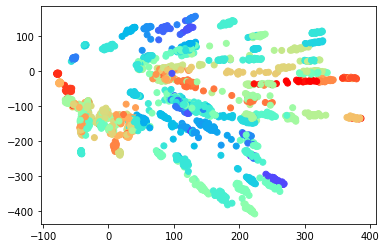

In [14]:
plt.scatter(z[:,0], z[:,1], c=c[:,0], cmap='rainbow')
plt.show()

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['pc1','pc2'])

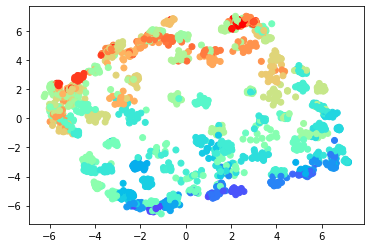

In [16]:
plt.show()
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=c[:,0], cmap='rainbow')
plt.show()

In [17]:
vae_results_dir = "../experiment_outputs/vanilla_vae/"
vae_model = SimpleVariationalModel.from_pretrained(vae_results_dir)

2022-08-19 16:06:02,313 - modeling.genomic_model - INFO - Loading model from {model_path}
2022-08-19 16:06:02,341 - modeling.genomic_model - INFO - Resolved config from ../experiment_outputs/vanilla_vae/config.json
2022-08-19 16:06:02,438 - modeling.genomic_model - INFO - Loaded weights from ../experiment_outputs/vanilla_vae/pytorch_model.bin


In [18]:
for t, (x, c) in enumerate(dataloader):
    mu, logvar = vae_model.encoder(x)
mu = np.asarray(mu.detach())
logvar = np.asarray(logvar.detach())

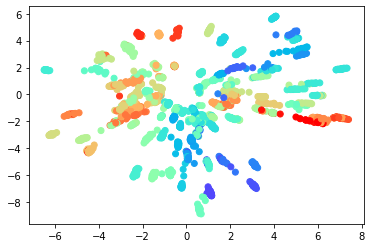

In [19]:
plt.scatter(mu[:,0], mu[:,1], c=c[:,0], cmap='rainbow')
plt.show()

ValueError: 'c' argument has 4072 elements, which is inconsistent with 'x' and 'y' with size 2036.

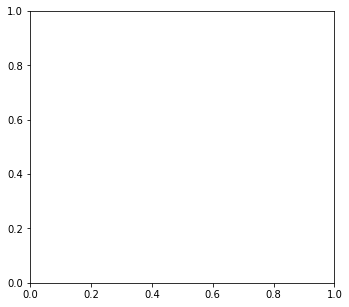

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(z[:,0], z[:,1], c=c, cmap='rainbow')
plt.xlabel("z dim 1")
plt.ylabel("z dim 2")
plt.title("Autoencoder Latent Space")
plt.colorbar(label="Populations")
plt.subplot(1,2,2)
plt.scatter(mu[:,0], mu[:,1], c=c, cmap='rainbow')
plt.title("Variational Autoencoder Latent Space")
plt.xlabel("mu 1")
plt.ylabel("mu 2")
plt.colorbar(label="Populations")
plt.savefig("latent_spaces.png")
plt.show()

In [21]:
vae_results_dir = "../experiment_outputs/vae_6/"
vae_model = SimpleVariationalModel.from_pretrained(vae_results_dir)

2022-08-19 16:06:06,325 - modeling.genomic_model - INFO - Loading model from {model_path}
2022-08-19 16:06:06,350 - modeling.genomic_model - INFO - Resolved config from ../experiment_outputs/vae_6/config.json
2022-08-19 16:06:06,400 - modeling.genomic_model - INFO - Loaded weights from ../experiment_outputs/vae_6/pytorch_model.bin


In [9]:
for t, (x, c) in enumerate(dataloader):
    mu, logvar = vae_model.encoder(x)
mu = np.asarray(mu.detach())
logvar = np.asarray(logvar.detach())

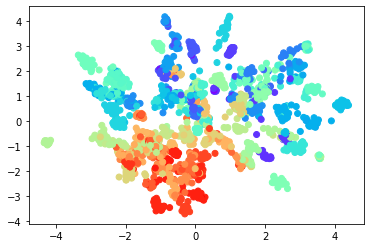

In [11]:
plt.scatter(mu[:,0], mu[:,1], c=c[:,0], cmap='rainbow')
plt.show()

In [12]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mu)
principalDf = pd.DataFrame(data=principalComponents, columns=['pc1','pc2'])

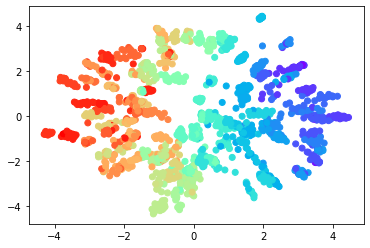

In [13]:
plt.show()
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=c[:,0], cmap='rainbow')
plt.show()

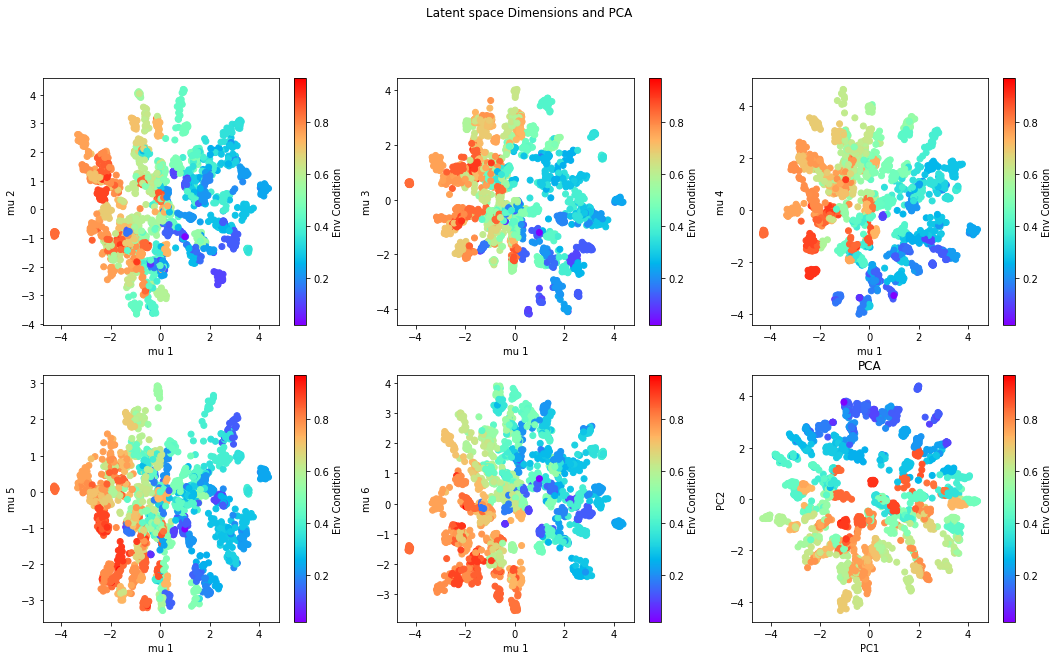

In [206]:
plt.figure(figsize=(18,10))
for i in range(1,6):
    plt.subplot(2,3,i)
    plt.scatter(mu[:,0], mu[:,i], c=c[:,1], cmap='rainbow')
    plt.colorbar(label="Env Condition")
    plt.xlabel("mu 1")
    plt.ylabel(f"mu {i+1}")
plt.subplot(2,3,6)
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=c[:,1], cmap='rainbow')
plt.colorbar(label="Env Condition")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt.suptitle("Latent space Dimensions and PCA")
plt.savefig("vae6_latent_spaces.png")
plt.show()

plt.figure(figsize=(12,5))
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=c[:,1], cmap='rainbow')


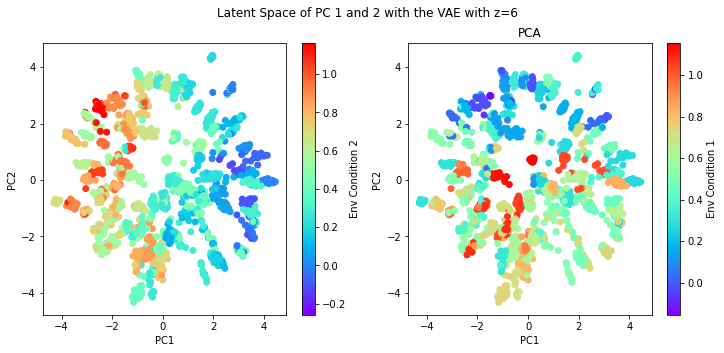

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=c[:,0], cmap='rainbow')
plt.colorbar(label="Env Condition 2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.subplot(1,2,2)
plt.scatter(principalDf['pc1'], principalDf['pc2'], c=c[:,1], cmap='rainbow')
plt.colorbar(label="Env Condition 1")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt.suptitle("Latent Space of PC 1 and 2 with the VAE with z=6")
plt.savefig("environmental_conditions_pca_vae.png")
plt.show()

VAE vs CVAE z=2

In [23]:
vae_results_dir = "../experiment_outputs/vanilla_vae/"
vae_model = SimpleVariationalModel.from_pretrained(vae_results_dir)

2022-08-19 16:13:38,149 - modeling.genomic_model - INFO - Loading model from {model_path}
2022-08-19 16:13:38,154 - modeling.genomic_model - INFO - Resolved config from ../experiment_outputs/vanilla_vae/config.json
2022-08-19 16:13:38,238 - modeling.genomic_model - INFO - Loaded weights from ../experiment_outputs/vanilla_vae/pytorch_model.bin


In [25]:
for t, (x, c) in enumerate(dataloader):
    mu, logvar = vae_model.encoder(x)
mu = np.asarray(mu.detach())
logvar = np.asarray(logvar.detach())

In [39]:
cvae_results_dir = "../experiment_outputs/vanilla_cvae/"
cvae_model = SimpleVariationalModel.from_pretrained(cvae_results_dir)

2022-08-19 22:07:01,926 - modeling.genomic_model - INFO - Loading model from {model_path}
2022-08-19 22:07:01,930 - modeling.genomic_model - INFO - Resolved config from ../experiment_outputs/vanilla_cvae/config.json
2022-08-19 22:07:02,034 - modeling.genomic_model - INFO - Loaded weights from ../experiment_outputs/vanilla_cvae/pytorch_model.bin


In [40]:
for t, (x, c) in enumerate(dataloader):
    cmu, clogvar = cvae_model.encoder(x, c)
cmu = np.asarray(cmu.detach())
clogvar = np.asarray(clogvar.detach())

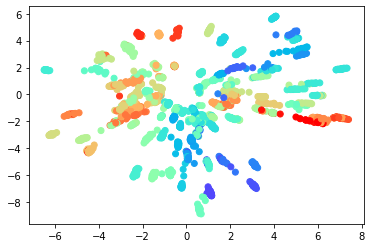

In [28]:
plt.scatter(mu[:,0], mu[:,1], c=c[:,0], cmap='rainbow')
plt.show()

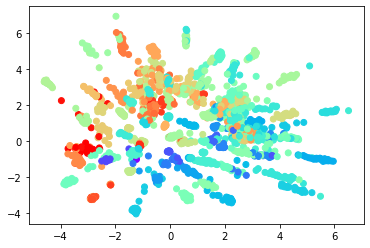

In [41]:
plt.scatter(cmu[:,0], cmu[:,1], c=c[:,0], cmap='rainbow')
plt.show()